In [71]:
import numpy as np
import scipy as sp 
from matplotlib import pyplot as plt
import pandas as pd

import pyam
pyam.iiasa.Connection('iamc15')

import sys
sys.path.append('/Users/stuartjenkins/Documents/$$Work/2019:02:01 - Carbon budgets with CO2-fe paper')
from fair_scm import *

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


In [2]:
# df = pyam.read_iiasa(
#     'iamc15',
#     model='MESSAGEix*',
#     variable=['Emissions|CO2', 'Primary Energy|Coal'],
#     region='World',
#     meta=['category'])



In [3]:
df_magicc = pyam.read_iiasa(
    'iamc15',
    model='*',
    variable=['AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED*', 'AR5 climate diagnostics|Forcing|MAGICC6|MED', 'AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED'],
    meta=['category'])

df_fair = pyam.read_iiasa(
    'iamc15',
    model='*',
    variable=['AR5 climate diagnostics|Temperature|Global Mean|FAIR|MED*', 'AR5 climate diagnostics|Forcing|FAIR|MED', 'AR5 climate diagnostics|Forcing|CO2|FAIR|MED'],
    meta=['category'])



INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer
INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


ADVANCE_2020_1.5C-2100
ADVANCE_2020_Med2C
ADVANCE_2020_WB2C
ADVANCE_2030_Med2C
ADVANCE_2030_Price1.5C
ADVANCE_2030_WB2C
ADVANCE_INDC
ADVANCE_NoPolicy
ADVANCE_Reference
SFCM_SSP2_Bio_1p5Degree
SFCM_SSP2_Bio_2Degree
SFCM_SSP2_Bio_Baseline
SFCM_SSP2_EEEI_1p5Degree
SFCM_SSP2_EEEI_2Degree
SFCM_SSP2_EEEI_Baseline
SFCM_SSP2_LifeStyle_1p5Degree
SFCM_SSP2_LifeStyle_2Degree
SFCM_SSP2_LifeStyle_Baseline
SFCM_SSP2_Ref_1p5Degree
SFCM_SSP2_Ref_2Degree
SFCM_SSP2_Ref_Baseline
SFCM_SSP2_ST_CCS_1p5Degree
SFCM_SSP2_ST_CCS_2Degree
SFCM_SSP2_ST_CCS_Baseline
SFCM_SSP2_ST_bio_1p5Degree
SFCM_SSP2_ST_bio_2Degree
SFCM_SSP2_ST_bio_Baseline
SFCM_SSP2_ST_nuclear_1p5Degree
SFCM_SSP2_ST_nuclear_2Degree
SFCM_SSP2_ST_nuclear_Baseline
SFCM_SSP2_ST_solar_1p5Degree
SFCM_SSP2_ST_solar_2Degree
SFCM_SSP2_ST_solar_Baseline
SFCM_SSP2_ST_wind_1p5Degree
SFCM_SSP2_ST_wind_2Degree
SFCM_SSP2_ST_wind_Baseline
SFCM_SSP2_SupTech_1p5Degree
SFCM_SSP2_SupTech_2Degree
SFCM_SSP2_SupTech_Baseline
SFCM_SSP2_combined_1p5Degree
SFCM_SSP2_comb

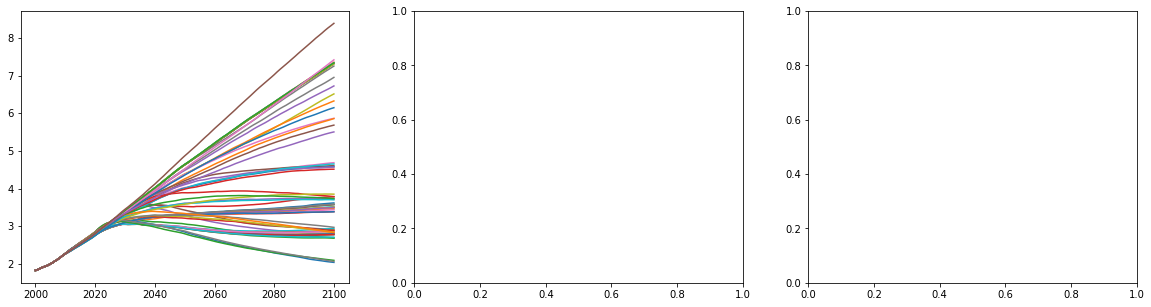

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

# df_magicc.as_pandas().year

for i in df_magicc.models():
#     print(i)
    if i == 'AIM/CGE 2.0':
        for j in df_magicc.filter(model=i).scenarios():
            print(j)
#             if 'ADVANCE' in j:
            years = df_magicc.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|MAGICC6|MED').as_pandas().year.values
            total_forcing_fair = df_magicc.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|MAGICC6|MED').as_pandas().value.values
            ax[0].plot(years, total_forcing_fair)
            


In [72]:
input_df = pyam.IamDataFrame(data='./data/iamc15_fair_magicc_temp_and_forcing.xlsx', encoding='utf-8')

RCP_85 = pd.read_csv('./data/RCP85_MIDYEAR_RADFORCING.csv', skiprows=58, index_col=0)

INFO:root:Reading `./data/iamc15_fair_magicc_temp_and_forcing.xlsx`


AIM/CGE 2.0 ADVANCE_2020_1.5C-2100
-26.323841579749907
AIM/CGE 2.0 SSP1-19
45.44973477824997
AIM/CGE 2.0 SSP2-19
21.381441111250084


(-0.3, 0.8)

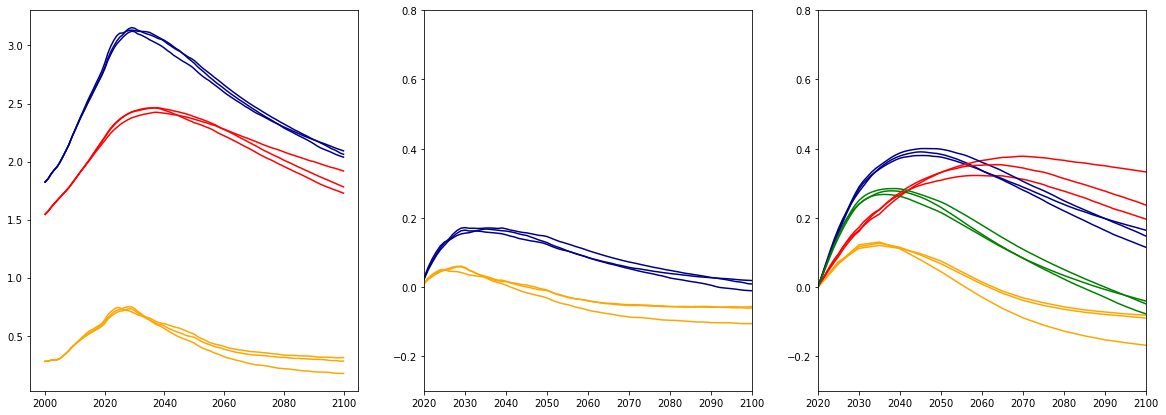

In [75]:
# input_df.variables()[7]
TCRE = 1.5
alpha=0.25
H = 100
AGWP_CO2 = H/1100

fig, ax = plt.subplots(1,3,figsize=(20,7))

for i in ['AIM/CGE 2.0']:#input_df.models():
    for j in input_df.filter(model=i).scenarios():
        print(i,j)
        
        year_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|MAGICC6|MED').as_pandas().year.values
        total_forcing_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|MAGICC6|MED').as_pandas().value.values
        ax[0].plot(year_to_plot, total_forcing_to_plot, color='darkblue')
        
        co2_year_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED').as_pandas().year.values
        co2_forcing_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED').as_pandas().value.values
        ax[0].plot(co2_year_to_plot, co2_forcing_to_plot, color='red')

        nonco2_forcing_to_plot = total_forcing_to_plot - co2_forcing_to_plot
        ax[0].plot(year_to_plot, nonco2_forcing_to_plot, color='orange')
        
        
        
        total_forcing_inc_hist = np.zeros(2101-1765)
        total_forcing_inc_hist[2000-1765:] = total_forcing_to_plot
        total_forcing_inc_hist[:2000-1765] = RCP_85.TOTAL_ANTHRO_RF.loc[:1999].values * total_forcing_to_plot[0] / RCP_85.TOTAL_ANTHRO_RF.loc[2000]
        fair_T = fair_scm(other_rf=total_forcing_inc_hist, tcrecs=np.array([1.85,3.0]))[1]
        
        
        
        
        totalRF_co2gwe_cumems = np.zeros(total_forcing_to_plot.size)
        totalRF_co2gwe_ems = np.zeros(total_forcing_to_plot.size) # in GtCO2 !!!
        
        for k in range(2020-year_to_plot[0],totalRF_co2gwe_ems.size):
            totalRF_co2gwe_cumems[k] = H*(1-alpha)*(total_forcing_to_plot[k] - total_forcing_to_plot[2019-year_to_plot[0]] + alpha*np.mean(total_forcing_to_plot[2020-year_to_plot[0]:k+1])*(k-2019+year_to_plot[0])/(H*(1-alpha)))/AGWP_CO2
            totalRF_co2gwe_ems[k] = totalRF_co2gwe_cumems[k] - totalRF_co2gwe_cumems[k-1]
            
        print(totalRF_co2gwe_cumems[-1])
        ax[1].plot(year_to_plot, totalRF_co2gwe_cumems*TCRE*12/44000, color='darkblue')
        
        
        nonCO2RF_co2gwe_cumems = np.zeros(nonco2_forcing_to_plot.size)
        nonCO2RF_co2gwe_ems = np.zeros(nonco2_forcing_to_plot.size) # in GtCO2 !!!
        
        for k in range(2020-year_to_plot[0],nonCO2RF_co2gwe_ems.size):
            nonCO2RF_co2gwe_cumems[k] = H*(1-alpha)*(nonco2_forcing_to_plot[k] - nonco2_forcing_to_plot[2019-year_to_plot[0]] + alpha*np.mean(nonco2_forcing_to_plot[2020-year_to_plot[0]:k+1])*(k-2019+year_to_plot[0])/(H*(1-alpha)))/AGWP_CO2
            nonCO2RF_co2gwe_ems[k] = nonCO2RF_co2gwe_cumems[k] - nonCO2RF_co2gwe_cumems[k-1]
            
        ax[1].plot(year_to_plot, nonCO2RF_co2gwe_cumems*TCRE*12/44000, color='orange')
        
        
        
        temp_year_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value').as_pandas().year.values
        total_temp_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value').as_pandas().value.values
        ax[2].plot(temp_year_to_plot, total_temp_to_plot - total_temp_to_plot[2020-temp_year_to_plot[0]], color='darkblue')
        
        nonco2_year_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value|Non CO2').as_pandas().year.values
        nonco2_temp_to_plot = input_df.filter(model=i, scenario=j, variable='AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|Expected value|Non CO2').as_pandas().value.values
        if nonco2_year_to_plot.size != 0:
            nonco2_temp_to_plot = np.interp(temp_year_to_plot, nonco2_year_to_plot, nonco2_temp_to_plot)
            ax[2].plot(temp_year_to_plot, nonco2_temp_to_plot - nonco2_temp_to_plot[2020-temp_year_to_plot[0]], color='orange')
        
            co2_temp_to_plot = total_temp_to_plot - nonco2_temp_to_plot
            ax[2].plot(temp_year_to_plot, co2_temp_to_plot - co2_temp_to_plot[2020-temp_year_to_plot[0]], color='red')
    
        ax[2].plot(np.arange(1765,2101), fair_T - fair_T[2020-1765], color='green')
        
ax[1].set_xlim(2020,2100)
ax[2].set_xlim(2020,2100)

ax[1].set_ylim(-0.3,0.8)
ax[2].set_ylim(-0.3,0.8)


In [ ]:
# plot of cumulative CO2 vs non-CO2 warming in magicc!

